## Model no 7

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ 
+ perception of corruption
+ positive affect
+ negative affect

! without freedom_to_make_life_choices

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_07'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_2005_2022_no5_gdp_sosupp_lifeexp_free_corrupt_affect.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 155.8+ KB


Define features and Target:

In [6]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')
features.remove('freedom_to_make_life_choices')

X = df[features]
y = df['life_ladder']

In [7]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect'],
      dtype='object')

In [8]:
print(X.shape, y.shape)

(1993, 6) (1993,)


Train-Test-Split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1395, 6) (598, 6) (1395,) (598,)


In [11]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,perceptions_of_corruption,positive_affect,negative_affect
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,9.346158,0.808794,63.204047,0.746466,0.655426,0.274835
std,1.149112,0.121564,6.934678,0.183435,0.104993,0.084008
min,5.527000,0.290000,6.720000,0.035000,0.308000,0.103000
25%,8.448000,0.741000,58.712500,0.692500,0.573000,0.214000
50%,9.497000,0.836000,64.900000,0.798000,0.668000,0.265000
75%,10.282000,0.904000,68.525000,0.867000,0.741000,0.326000
max,11.664000,0.985000,74.475000,0.983000,0.884000,0.705000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [13]:
X_train_scaled.shape

(1395, 6)

In [14]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='perceptions_of_corruption', ylabel='life_ladder'>

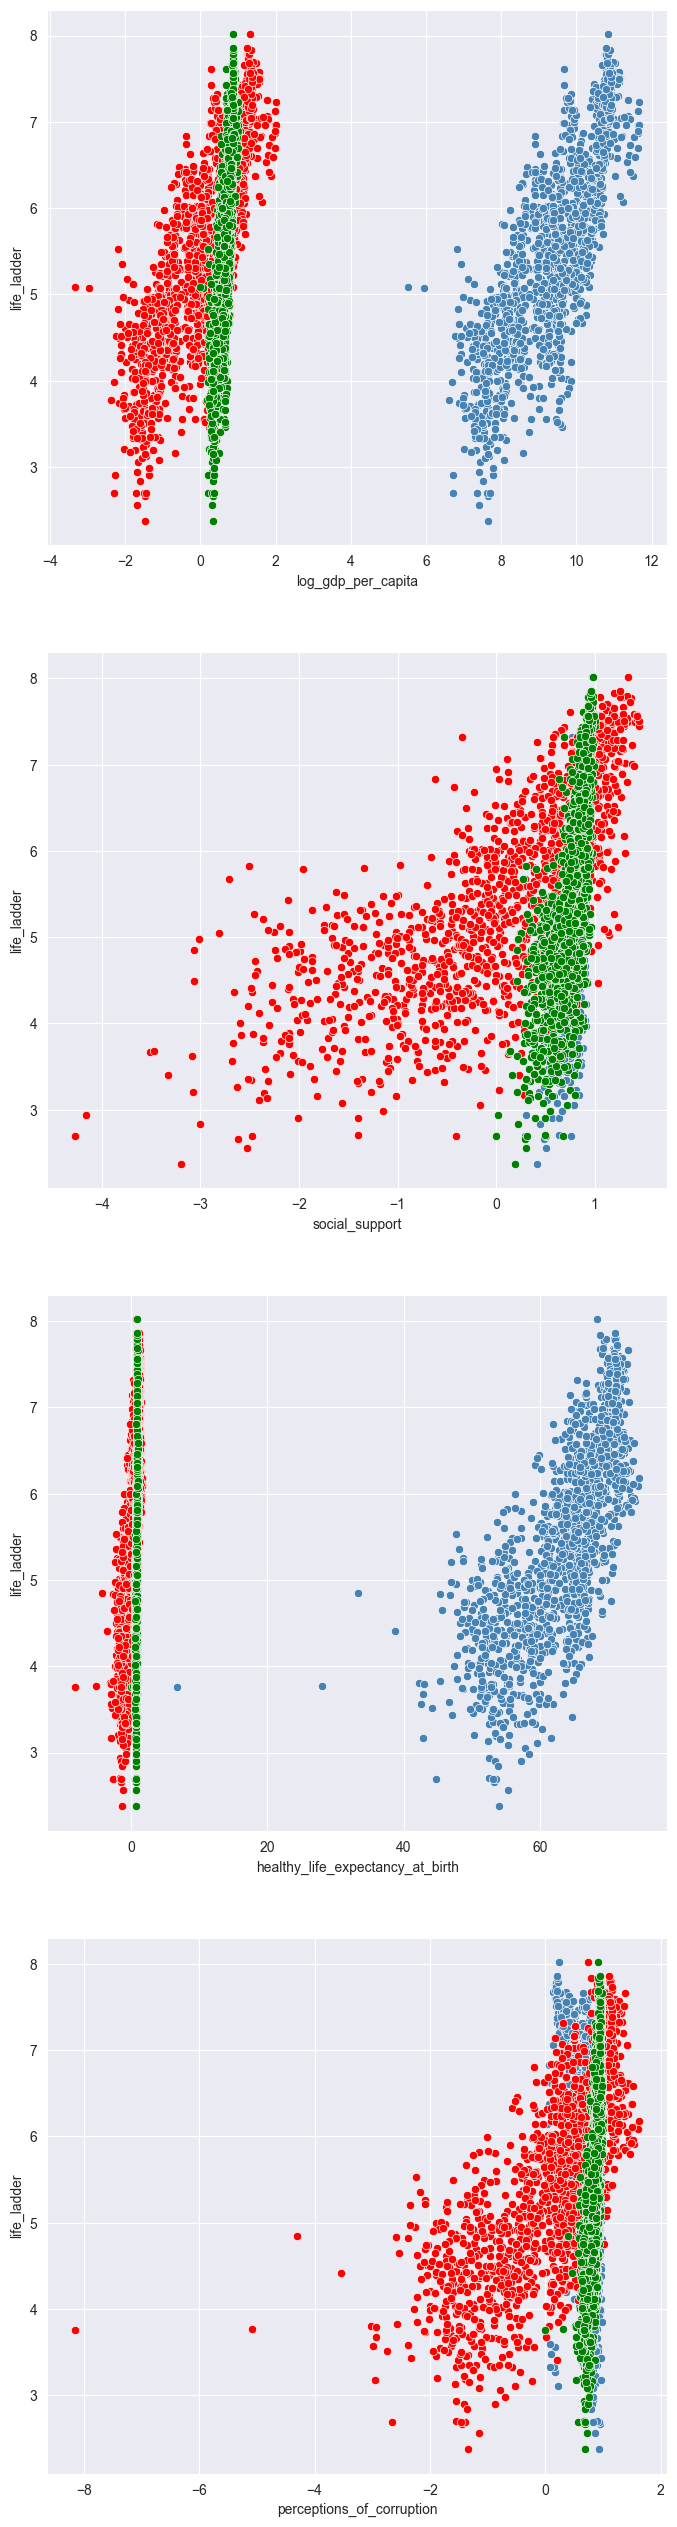

In [15]:
fig,ax = plt.subplots(4,1,figsize=(8,32))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[3], x = X_train.perceptions_of_corruption, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[3], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[3], x = X_train_normalized[:,2], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [16]:
lin_reg_error_lst = []

for i in range(1,4):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_07_lin_reg_2,0.499,0.807,0.384,0.077,0.492,0.817,0.376,0.075,0.007,0.008,0.010
0,model_07_lin_reg_1,0.544,0.770,0.417,0.084,0.533,0.785,0.407,0.083,0.011,0.010,0.015
2,model_07_lin_reg_3,0.466,0.832,0.357,0.071,0.496,0.814,0.376,0.075,0.030,0.019,0.018


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51941/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


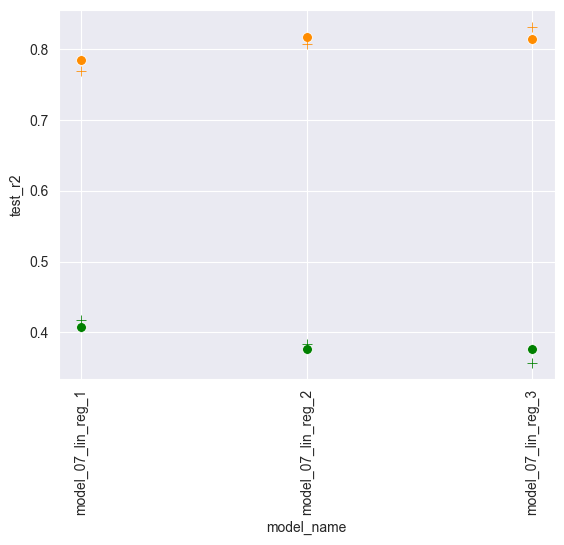

In [17]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [18]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_07_lin_reg_scaler_0,0.767
1,model_07_lin_reg_scaler_1,0.767
2,model_07_lin_reg_scaler_2,0.767


part df with the best models:

In [19]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_07_lin_reg_2,0.499,0.807,0.384,0.077,0.492,0.817,0.376,0.075,0.007,0.008,0.010
2,model_07_lin_reg_3,0.466,0.832,0.357,0.071,0.496,0.814,0.376,0.075,0.030,0.019,0.018
0,model_07_lin_reg_1,0.544,0.770,0.417,0.084,0.533,0.785,0.407,0.083,0.011,0.010,0.015


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [20]:
knn_error_lst = []
for metr in range(1,2):
    for neigh in np.arange(25,60,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
#knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_07_knn_1_25,0.468,0.830,0.362,0.074,0.497,0.813,0.377,0.078,0.029,0.015,0.017
1,model_07_knn_1_30,0.476,0.825,0.368,0.075,0.499,0.811,0.378,0.078,0.023,0.010,0.014
2,model_07_knn_1_35,0.481,0.821,0.373,0.076,0.504,0.808,0.381,0.079,0.023,0.008,0.013
3,model_07_knn_1_40,0.483,0.819,0.375,0.076,0.508,0.805,0.383,0.079,0.025,0.008,0.014
4,model_07_knn_1_45,0.487,0.816,0.379,0.077,0.510,0.803,0.386,0.080,0.023,0.007,0.013
5,model_07_knn_1_50,0.493,0.812,0.382,0.078,0.512,0.801,0.387,0.080,0.019,0.005,0.011
6,model_07_knn_1_55,0.497,0.809,0.385,0.079,0.514,0.800,0.388,0.080,0.017,0.003,0.009


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51941/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


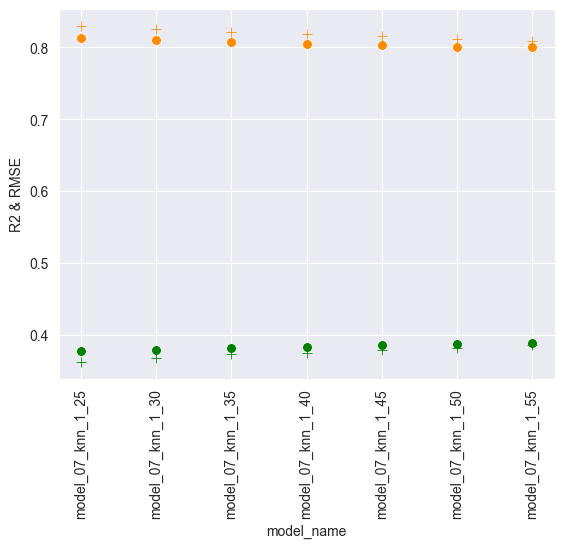

In [21]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [22]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:7]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_07_knn_1_25,0.468,0.830,0.362,0.074,0.497,0.813,0.377,0.078,0.029,0.015,0.017
1,model_07_knn_1_30,0.476,0.825,0.368,0.075,0.499,0.811,0.378,0.078,0.023,0.010,0.014
2,model_07_knn_1_35,0.481,0.821,0.373,0.076,0.504,0.808,0.381,0.079,0.023,0.008,0.013
3,model_07_knn_1_40,0.483,0.819,0.375,0.076,0.508,0.805,0.383,0.079,0.025,0.008,0.014
4,model_07_knn_1_45,0.487,0.816,0.379,0.077,0.510,0.803,0.386,0.080,0.023,0.007,0.013
5,model_07_knn_1_50,0.493,0.812,0.382,0.078,0.512,0.801,0.387,0.080,0.019,0.005,0.011
6,model_07_knn_1_55,0.497,0.809,0.385,0.079,0.514,0.800,0.388,0.080,0.017,0.003,0.009


scaling data

In [23]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_07_knn_scaler_1,0.805
2,model_07_knn_scaler_2,0.803
0,model_07_knn_scaler_0,0.749


Decision Tree Model

In [24]:
dtree = DecisionTreeRegressor(max_depth = 5, 
                            max_leaf_nodes = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20)

In [25]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.479
train_r2  0.822
train_mae  0.375
train_mape  0.075
test_rmse  0.53
test_r2  0.788
test_mae  0.413
test_mape  0.082


In [26]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

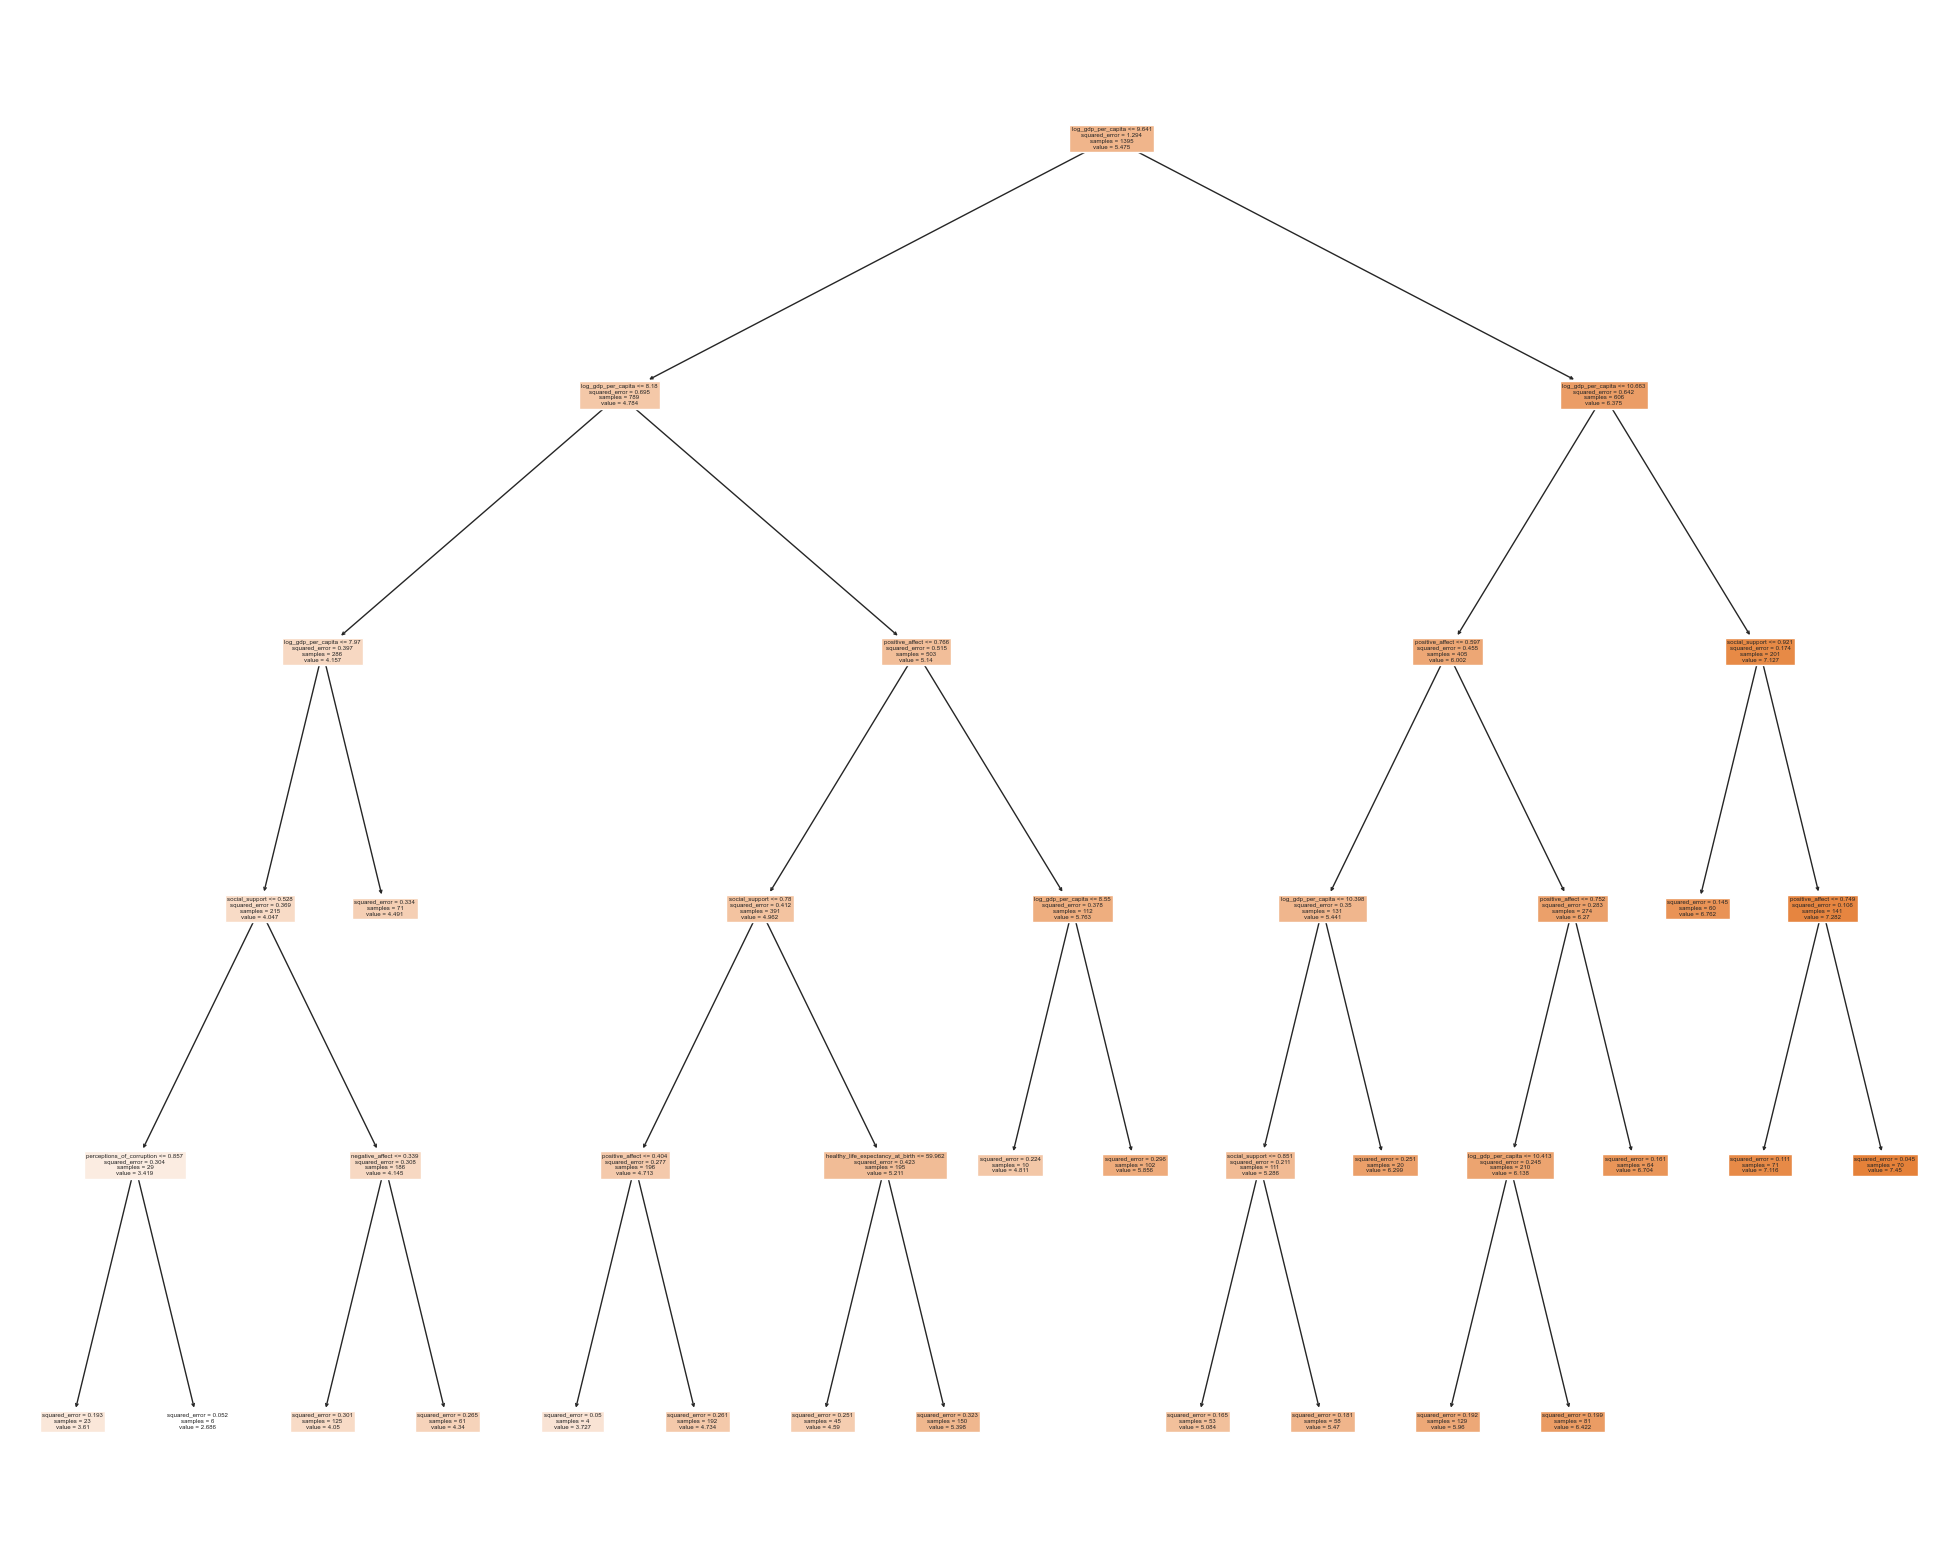

In [27]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [28]:
dectree_error_lst = []
for depth in np.arange(5,8,1):
    for leaf in np.arange(20,31,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])
#dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
3,model_07_dectree_dep_6_max_leaf_20,0.477,0.823,0.372,0.074,0.526,0.791,0.408,0.081,0.049,0.036,0.032
0,model_07_dectree_dep_5_max_leaf_20,0.479,0.822,0.375,0.075,0.530,0.788,0.413,0.082,0.051,0.038,0.034
6,model_07_dectree_dep_7_max_leaf_20,0.476,0.824,0.374,0.075,0.528,0.789,0.414,0.082,0.052,0.040,0.035
1,model_07_dectree_dep_5_max_leaf_25,0.470,0.829,0.367,0.073,0.530,0.787,0.411,0.082,0.060,0.044,0.042
4,model_07_dectree_dep_6_max_leaf_25,0.465,0.832,0.364,0.072,0.529,0.788,0.410,0.081,0.064,0.046,0.044
2,model_07_dectree_dep_5_max_leaf_30,0.464,0.833,0.362,0.072,0.530,0.788,0.408,0.081,0.066,0.046,0.045
7,model_07_dectree_dep_7_max_leaf_25,0.462,0.834,0.363,0.072,0.529,0.788,0.412,0.082,0.067,0.049,0.046
5,model_07_dectree_dep_6_max_leaf_30,0.454,0.840,0.357,0.071,0.527,0.790,0.409,0.081,0.073,0.052,0.050
8,model_07_dectree_dep_7_max_leaf_30,0.451,0.842,0.355,0.071,0.526,0.791,0.410,0.081,0.075,0.055,0.051


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51941/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


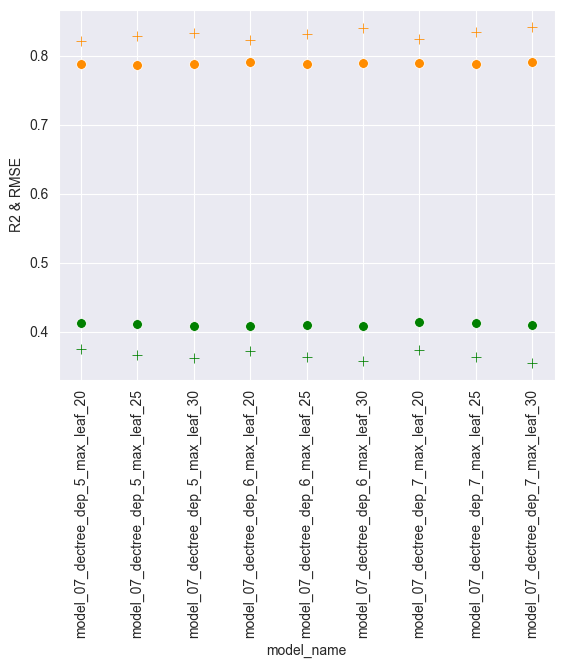

In [29]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [30]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
3,model_07_dectree_dep_6_max_leaf_20,0.477,0.823,0.372,0.074,0.526,0.791,0.408,0.081,0.049,0.036,0.032
0,model_07_dectree_dep_5_max_leaf_20,0.479,0.822,0.375,0.075,0.530,0.788,0.413,0.082,0.051,0.038,0.034
6,model_07_dectree_dep_7_max_leaf_20,0.476,0.824,0.374,0.075,0.528,0.789,0.414,0.082,0.052,0.040,0.035
1,model_07_dectree_dep_5_max_leaf_25,0.470,0.829,0.367,0.073,0.530,0.787,0.411,0.082,0.060,0.044,0.042
4,model_07_dectree_dep_6_max_leaf_25,0.465,0.832,0.364,0.072,0.529,0.788,0.410,0.081,0.064,0.046,0.044
2,model_07_dectree_dep_5_max_leaf_30,0.464,0.833,0.362,0.072,0.530,0.788,0.408,0.081,0.066,0.046,0.045


Random Forest 

In [31]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 29
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.473
train_r2  0.826
train_mae  0.368
train_mape  0.075
test_rmse  0.507
test_r2  0.805
test_mae  0.38
test_mape  0.078


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [32]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [33]:
random_trees_error_lst = []
for tree_depth in np.arange(5,7,1):
    for tree_leaf in np.arange(15,31,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_07_forest_tree_depth5_max_leaf_15,0.466,0.831,0.363,0.073,0.504,0.808,0.378,0.077,0.038,0.015,0.023,29,5,100
4,model_07_forest_tree_depth6_max_leaf_15,0.465,0.832,0.362,0.073,0.503,0.808,0.378,0.077,0.038,0.016,0.024,29,5,100
1,model_07_forest_tree_depth5_max_leaf_20,0.450,0.843,0.350,0.071,0.492,0.817,0.370,0.075,0.042,0.020,0.026,39,5,100
5,model_07_forest_tree_depth6_max_leaf_20,0.447,0.845,0.348,0.070,0.492,0.817,0.371,0.076,0.045,0.023,0.028,39,5,100
2,model_07_forest_tree_depth5_max_leaf_25,0.441,0.849,0.343,0.069,0.487,0.820,0.366,0.075,0.046,0.023,0.029,49,5,100
3,model_07_forest_tree_depth5_max_leaf_30,0.437,0.852,0.339,0.069,0.484,0.822,0.364,0.074,0.047,0.025,0.030,58,5,100
6,model_07_forest_tree_depth6_max_leaf_25,0.433,0.854,0.337,0.068,0.484,0.822,0.365,0.074,0.051,0.028,0.032,49,6,100
7,model_07_forest_tree_depth6_max_leaf_30,0.423,0.861,0.329,0.067,0.480,0.826,0.361,0.074,0.057,0.032,0.035,59,6,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51941/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


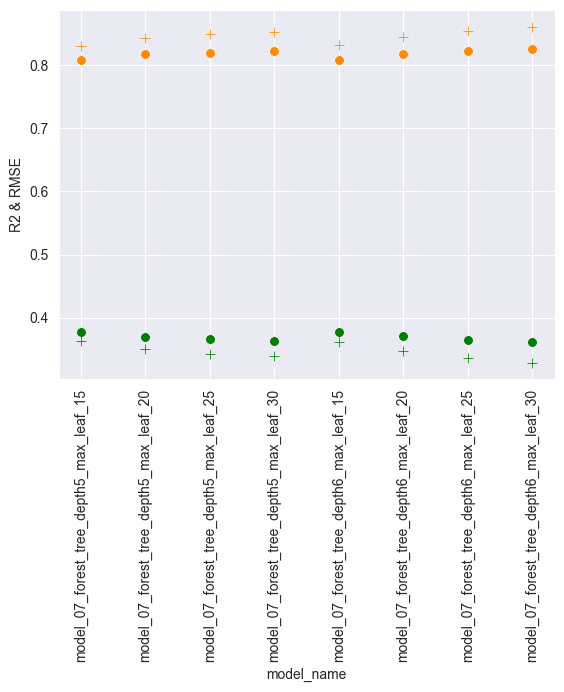

In [34]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [35]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:7]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_07_forest_tree_depth5_max_leaf_15,0.466,0.831,0.363,0.073,0.504,0.808,0.378,0.077,0.038,0.015,0.023,29,5,100
4,model_07_forest_tree_depth6_max_leaf_15,0.465,0.832,0.362,0.073,0.503,0.808,0.378,0.077,0.038,0.016,0.024,29,5,100
1,model_07_forest_tree_depth5_max_leaf_20,0.450,0.843,0.350,0.071,0.492,0.817,0.370,0.075,0.042,0.020,0.026,39,5,100
5,model_07_forest_tree_depth6_max_leaf_20,0.447,0.845,0.348,0.070,0.492,0.817,0.371,0.076,0.045,0.023,0.028,39,5,100
2,model_07_forest_tree_depth5_max_leaf_25,0.441,0.849,0.343,0.069,0.487,0.820,0.366,0.075,0.046,0.023,0.029,49,5,100
3,model_07_forest_tree_depth5_max_leaf_30,0.437,0.852,0.339,0.069,0.484,0.822,0.364,0.074,0.047,0.025,0.030,58,5,100
6,model_07_forest_tree_depth6_max_leaf_25,0.433,0.854,0.337,0.068,0.484,0.822,0.365,0.074,0.051,0.028,0.032,49,6,100


Test: AdaBoostRegressor

In [36]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_07_ada_boost,0.477,0.824,0.394,0.077,0.534,0.786,0.414,0.083,0.057,0.038,0.02


In [37]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [38]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                criterion= 'squared_error',
                                max_depth = 5, 
                                max_leaf_nodes = 20,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_07_gbr_boost,0.256,0.949,0.442,0.852,0.186,0.097


In [39]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [40]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
6,model_07_knn_1_55,0.497,0.809,0.385,0.079,0.514,0.800,0.388,0.080,0.017,0.003,0.009,NaN,NaN,NaN
1,model_07_lin_reg_2,0.499,0.807,0.384,0.077,0.492,0.817,0.376,0.075,0.007,0.008,0.010,NaN,NaN,NaN
5,model_07_knn_1_50,0.493,0.812,0.382,0.078,0.512,0.801,0.387,0.080,0.019,0.005,0.011,NaN,NaN,NaN
2,model_07_knn_1_35,0.481,0.821,0.373,0.076,0.504,0.808,0.381,0.079,0.023,0.008,0.013,NaN,NaN,NaN
4,model_07_knn_1_45,0.487,0.816,0.379,0.077,0.510,0.803,0.386,0.080,0.023,0.007,0.013,NaN,NaN,NaN
1,model_07_knn_1_30,0.476,0.825,0.368,0.075,0.499,0.811,0.378,0.078,0.023,0.010,0.014,NaN,NaN,NaN
3,model_07_knn_1_40,0.483,0.819,0.375,0.076,0.508,0.805,0.383,0.079,0.025,0.008,0.014,NaN,NaN,NaN
0,model_07_lin_reg_1,0.544,0.770,0.417,0.084,0.533,0.785,0.407,0.083,0.011,0.010,0.015,NaN,NaN,NaN
0,model_07_knn_1_25,0.468,0.830,0.362,0.074,0.497,0.813,0.377,0.078,0.029,0.015,0.017,NaN,NaN,NaN
2,model_07_lin_reg_3,0.466,0.832,0.357,0.071,0.496,0.814,0.376,0.075,0.030,0.019,0.018,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51941/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


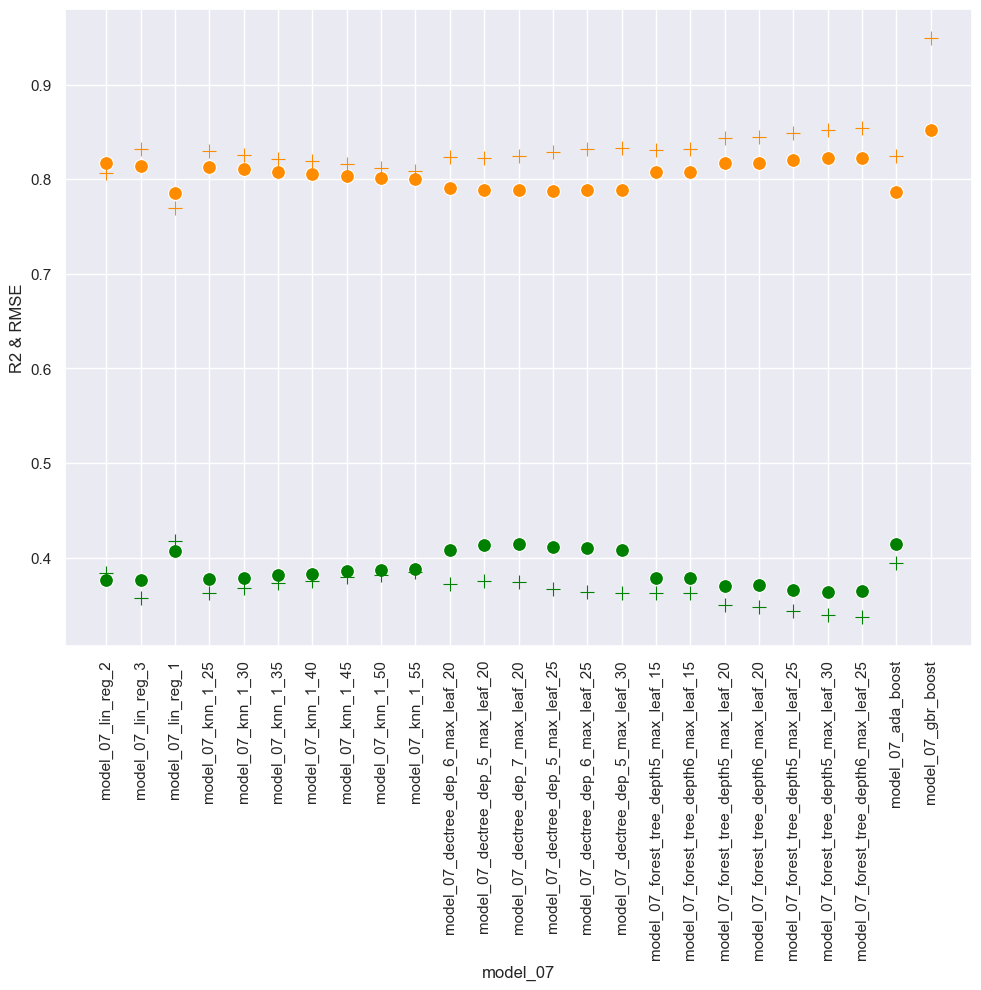

In [41]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [42]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)

In [43]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
5,negative_affect,0.036480
3,perceptions_of_corruption,0.078314
4,positive_affect,0.103636
1,social_support,0.208343
2,healthy_life_expectancy_at_birth,0.215122
0,log_gdp_per_capita,0.358106


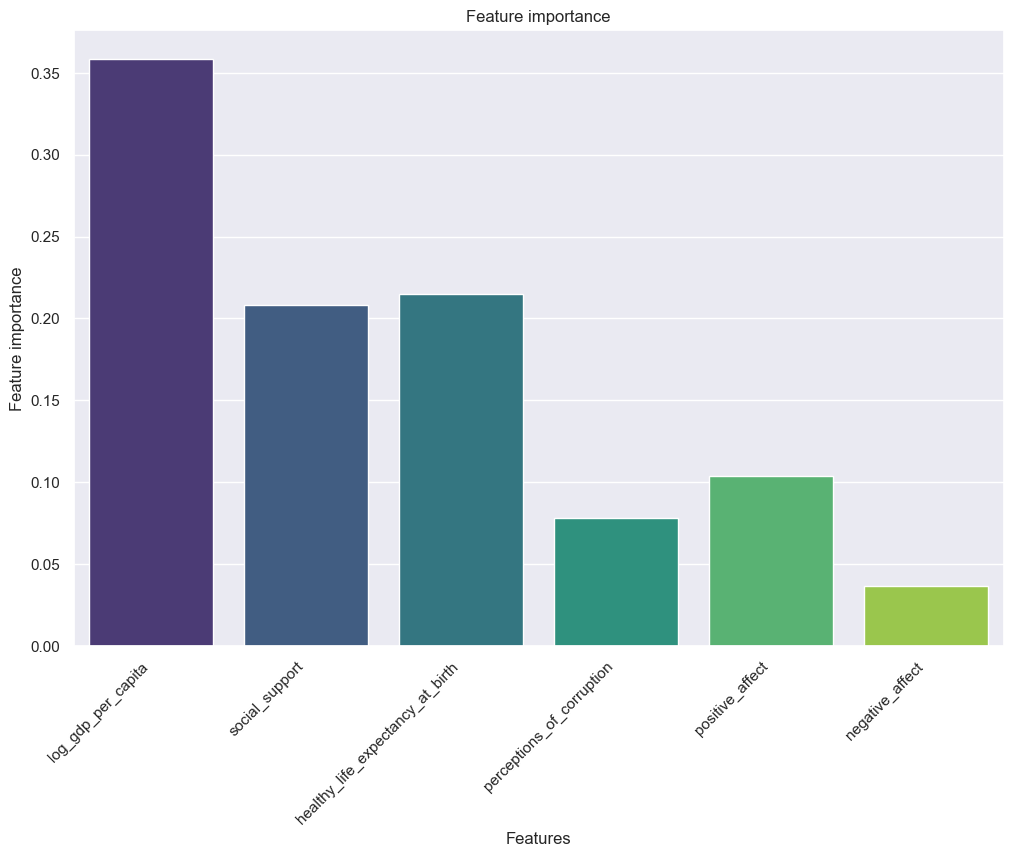

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()